In [18]:
import folium

dfl = df.head(300)
m = folium.Map(location=[40.753093719482415, -73.97315979003906], zoom_start=12)
result = [folium.Marker([x1, y1]).add_to(m) and folium.Marker([x2, y2]).add_to(m) for x1, y1, x2, y2 in zip(dfl['pickup_latitude'], dfl['pickup_longitude'], dfl['dropoff_latitude'], dfl['dropoff_longitude'])]
m.save("name1.html")
#40.691510, -74.020491
#40.820779, -73.919535


In [95]:
df2 = df[(40.691510 < df.pickup_latitude) & (40.691510 < df.dropoff_latitude) & (df.pickup_latitude < 40.820779) & (df.dropoff_latitude < 40.820779)]
df2 = df2[(-74.020491 < df2.pickup_longitude) & (-74.020491 < df2.dropoff_longitude) & (df2.pickup_longitude < -73.919535) & (df2.dropoff_longitude < -73.919535)]
dfl = df2.head(300)
m = folium.Map(location=[40.753093719482415, -73.97315979003906], zoom_start=12)
result = [folium.Marker([x1, y1]).add_to(m) and folium.Marker([x2, y2]).add_to(m) for x1, y1, x2, y2 in zip(dfl['pickup_latitude'], dfl['pickup_longitude'], dfl['dropoff_latitude'], dfl['dropoff_longitude'])]
m.save("name2.html")
df2

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
0,id1080784,2.0,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,400
1,id0889885,1.0,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,1100
2,id0857912,2.0,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,1635
3,id3744273,2.0,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,1141
4,id0232939,1.0,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,848
...,...,...,...,...,...,...,...,...,...,...
729317,id3905982,2.0,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,296
729318,id0102861,1.0,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,315
729319,id0439699,1.0,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,673
729320,id2078912,1.0,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,447


In [96]:
print(df2.min())
print(df2.max())

dates = [[(2016, i, j) for j in range(1, 31)] for i in range(1, 7)]
print(dates)

id                             id0000001
vendor_id                            1.0
pickup_datetime      2016-01-01 00:01:14
dropoff_datetime     2016-01-01 00:05:54
passenger_count                        0
pickup_longitude              -74.020241
pickup_latitude                40.691513
dropoff_longitude             -74.020447
dropoff_latitude               40.691517
trip_duration                          1
dtype: object
id                             id4000000
vendor_id                            2.0
pickup_datetime      2016-06-30 23:59:37
dropoff_datetime     2016-07-01 23:02:03
passenger_count                        6
pickup_longitude               -73.91954
pickup_latitude                 40.82077
dropoff_longitude              -73.91954
dropoff_latitude               40.820774
trip_duration                      86387
dtype: object
[[(2016, 1, 1), (2016, 1, 2), (2016, 1, 3), (2016, 1, 4), (2016, 1, 5), (2016, 1, 6), (2016, 1, 7), (2016, 1, 8), (2016, 1, 9), (2016, 1, 10), (2016, 1,

In [97]:
print(len(df["id"].unique()))

#df["latitude"] = df["pickup_latitude"] - df["pickup_latitude"]
df2["hour"] = df2["pickup_datetime"].apply(lambda date: int(date[11:13]))
df2["mounth"] = df2["pickup_datetime"].apply(lambda date: int(date[5:7]))
#df2["day"] = df2["pickup_datetime"].apply(lambda date: int(date[8:10]))
df_save_hour = df2["hour"]
df_hours = pd.get_dummies(df_save_hour, prefix="hour")
df_test = df2
df_test["hour_4_9"] = df_hours.hour_4 + df_hours.hour_5 + df_hours.hour_6 + df_hours.hour_7 + df_hours.hour_8 + df_hours.hour_9
df_test["hour_10_15"] = df_hours.hour_10 + df_hours.hour_11 + df_hours.hour_12 + df_hours.hour_13 + df_hours.hour_14 + df_hours.hour_15
df_test["hour_16_15"] = df_hours.hour_16 + df_hours.hour_17 + df_hours.hour_18 + df_hours.hour_19 + df_hours.hour_20 + df_hours.hour_21
df_test["hour_night"] = df_hours.hour_22 + df_hours.hour_23 + df_hours.hour_0 + df_hours.hour_1 + df_hours.hour_2 + df_hours.hour_3
df_test = pd.get_dummies(df_test, prefix=["mounth"], columns=["mounth"])
df_test = pd.get_dummies(df_test, prefix=["vendor_id"], columns=["vendor_id"])
df_test = pd.get_dummies(df_test, prefix=["passenger_count"], columns=["passenger_count"])
df_test.info()
#df_test = pd.get_dummies(df, prefix=["day"], columns=["day"])

#print(df['pickup_datetime'][0])
#print(dt.strptime(df['pickup_datetime'][0], '%Y-%m-%d %H:%M:%S').date().toordinal())
#print(dt.strptime(df['pickup_datetime'][0], '%Y-%m-%d %H:%M:%S').time().toordinal())

725295
<class 'pandas.core.frame.DataFrame'>
Int64Index: 629577 entries, 0 to 729321
Data columns (total 28 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 629577 non-null  object 
 1   pickup_datetime    629577 non-null  object 
 2   dropoff_datetime   629577 non-null  object 
 3   pickup_longitude   629577 non-null  float64
 4   pickup_latitude    629577 non-null  float64
 5   dropoff_longitude  629577 non-null  float64
 6   dropoff_latitude   629577 non-null  float64
 7   trip_duration      629577 non-null  int64  
 8   hour               629577 non-null  int64  
 9   hour_4_9           629577 non-null  uint8  
 10  hour_10_15         629577 non-null  uint8  
 11  hour_16_15         629577 non-null  uint8  
 12  hour_night         629577 non-null  uint8  
 13  mounth_1           629577 non-null  uint8  
 14  mounth_2           629577 non-null  uint8  
 15  mounth_3           629577 non-null  uint8  


# Задача 1

**Загрузите датасет для регрессии, выполните предварительную обработку (удалите пропуски, приведите все признаки к числам), выделите целевой признак и предикторы, разбейте данные на обучающую и тестовую выборку.**

In [85]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from math import sqrt, pow
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from datetime import datetime as dt

- **Загрузка датасета**

In [86]:
df = pd.read_csv('../data/trip_duration_task.csv')

df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
0,id1080784,2.0,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,400
1,id0889885,1.0,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,1100
2,id0857912,2.0,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,1635
3,id3744273,2.0,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,1141
4,id0232939,1.0,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,848
...,...,...,...,...,...,...,...,...,...,...
729317,id3905982,2.0,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,296
729318,id0102861,1.0,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,315
729319,id0439699,1.0,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,673
729320,id2078912,1.0,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,447


## Предобработка датасета

- **Удаление столбцов id, dropoff_datetime(т.к. является искомым)**

In [87]:
df1 = df.drop(["id", "dropoff_datetime"], axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   vendor_id          727135 non-null  float64
 1   pickup_datetime    729322 non-null  object 
 2   passenger_count    729322 non-null  int64  
 3   pickup_longitude   729322 non-null  float64
 4   pickup_latitude    727475 non-null  float64
 5   dropoff_longitude  729322 non-null  float64
 6   dropoff_latitude   729322 non-null  float64
 7   trip_duration      729322 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 44.5+ MB


- **Исключение пустых строк**

In [88]:
df2 = df1.dropna()

- **Отбор основных путей перездок для улучшения результата прогноза**

In [89]:
import folium

dfl = df.head(500)
m = folium.Map(location=[40.753093719482415, -73.97315979003906], zoom_start=12)
result = [folium.Marker([x1, y1]).add_to(m) and folium.Marker([x2, y2]).add_to(m) for x1, y1, x2, y2 in zip(dfl['pickup_latitude'], dfl['pickup_longitude'], dfl['dropoff_latitude'], dfl['dropoff_longitude'])]
m.save("name1.html")
#40.691510, -74.020491
#40.820779, -73.919535

df3 = df2[(40.691510 < df2.pickup_latitude) & (40.691510 < df2.dropoff_latitude) & (df2.pickup_latitude < 40.820779) & (df2.dropoff_latitude < 40.820779)]
df3 = df3[(-74.020491 < df3.pickup_longitude) & (-74.020491 < df3.dropoff_longitude) & (df3.pickup_longitude < -73.919535) & (df3.dropoff_longitude < -73.919535)]

![plot](./loc.png)

- **Выделение прзнака из даты отправки - часовой период, из кол-ва пассажиров - 2 типа вместительности; удаление столбца vendor_idt**

In [90]:
df4 = df3
df_hours = pd.get_dummies(df4["pickup_datetime"].apply(lambda date: int(date[11:13])), prefix="hour")
df4["hour_4_9"] = df_hours.hour_4 + df_hours.hour_5 + df_hours.hour_6 + df_hours.hour_7 + df_hours.hour_8 + df_hours.hour_9
df4["hour_10_15"] = df_hours.hour_10 + df_hours.hour_11 + df_hours.hour_12 + df_hours.hour_13 + df_hours.hour_14 + df_hours.hour_15
df4["hour_16_15"] = df_hours.hour_16 + df_hours.hour_17 + df_hours.hour_18 + df_hours.hour_19 + df_hours.hour_20 + df_hours.hour_21
df4["hour_night"] = df_hours.hour_22 + df_hours.hour_23 + df_hours.hour_0 + df_hours.hour_1 + df_hours.hour_2 + df_hours.hour_3

print(df4["passenger_count"].unique())
df4["pas0-3"] = df4["passenger_count"].apply(lambda count: 1 if count < 4 else 0)
df4["pas4-6"] = df4["passenger_count"].apply(lambda count: 1 if count > 3 else 0)

df4 = df4.drop(["pickup_datetime", "vendor_id", "passenger_count"], axis=1)
df4.info()

[1 2 6 3 4 5 0]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 629577 entries, 0 to 729321
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pickup_longitude   629577 non-null  float64
 1   pickup_latitude    629577 non-null  float64
 2   dropoff_longitude  629577 non-null  float64
 3   dropoff_latitude   629577 non-null  float64
 4   trip_duration      629577 non-null  int64  
 5   hour_4_9           629577 non-null  uint8  
 6   hour_10_15         629577 non-null  uint8  
 7   hour_16_15         629577 non-null  uint8  
 8   hour_night         629577 non-null  uint8  
 9   pas0-3             629577 non-null  int64  
 10  pas4-6             629577 non-null  int64  
dtypes: float64(4), int64(3), uint8(4)
memory usage: 40.8 MB


- **Избавляемся от слишком завышенных параметров времени поездки**

In [91]:
df5 = df4
print(df5[df5["trip_duration"]>8000].shape[0])
df5 = df5[df5["trip_duration"]<8000]
df5.info()

838
<class 'pandas.core.frame.DataFrame'>
Int64Index: 628739 entries, 0 to 729321
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pickup_longitude   628739 non-null  float64
 1   pickup_latitude    628739 non-null  float64
 2   dropoff_longitude  628739 non-null  float64
 3   dropoff_latitude   628739 non-null  float64
 4   trip_duration      628739 non-null  int64  
 5   hour_4_9           628739 non-null  uint8  
 6   hour_10_15         628739 non-null  uint8  
 7   hour_16_15         628739 non-null  uint8  
 8   hour_night         628739 non-null  uint8  
 9   pas0-3             628739 non-null  int64  
 10  pas4-6             628739 non-null  int64  
dtypes: float64(4), int64(3), uint8(4)
memory usage: 40.8 MB


- **Выделение целевого признака и предикатов.**

In [92]:
y = df5['trip_duration']
X = df5.drop(['trip_duration'], axis = 1)

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

In [94]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((188621, 10), (188621,), (440118, 10), (440118,))

# Задача 2

**Решите задачу регрессии на ваших данных с использованием моделей sklearn (линейная регрессия + L1, L2), для моделей с регуляризациями подберите гиперпараметр.**

- **!Подготовка нескольких гиперпараметров**

In [31]:
parameters = {'alpha': np.arange(0.1, 1, 0.05)}

- **Линейная регрессия.**

In [32]:
lr = LinearRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)


In [33]:
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test, y_pred))}')
score_lr = lr.score(X_test, y_test)
print(f'R^2: {score_lr}')

MAE: 341.1234890415752
MSE: 202965.0035545865
RMSE: 450.5163743468005
MAPE: 1.018035107416991
R^2: 0.029860059133300698


In [34]:
lr.coef_

array([-2.08367339e+03, -1.76556090e+02,  2.67961262e+03, -2.65387101e+03,
       -1.16687884e+15, -1.16687884e+15, -1.16687884e+15, -1.16687884e+15,
       -2.18366488e+14, -2.18366488e+14])

- **Линейная регрессия. Регуляризация L1 / Ridge.**

In [35]:
# L1(RandomizedSearchCV)
ridge_optimal = RandomizedSearchCV(Ridge(), parameters).fit(X_train, y_train)
ridge = Ridge(alpha=ridge_optimal.best_params_['alpha']).fit(X_train, y_train)
y_pred = ridge.predict(X_test)


In [36]:
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test, y_pred))}')
score_lr_L1_RandomSearchCV = ridge.score(X_test, y_test)
print(f'R^2: {score_lr_L1_RandomSearchCV}')

MAE: 341.07176164072
MSE: 202956.425591183
RMSE: 450.5068541001158
MAPE: 1.0178538186152335
R^2: 0.029901060413143332


In [37]:
ridge.coef_

array([-2070.39546541,  -186.04690864,  2664.94295195, -2643.72546617,
         -33.89187604,    78.18026526,    17.72964261,   -62.01803165,
          -5.63969708,     5.63969708])

In [38]:
# L1(GridSearchCV)
ridge_optimal = GridSearchCV(Ridge(), parameters).fit(X_train, y_train)
ridge = Ridge(alpha=ridge_optimal.best_params_['alpha']).fit(X_train, y_train)
y_pred = ridge.predict(X_test)

In [39]:
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test, y_pred))}')
score_lr_L1_GridSearchCV = ridge.score(X_test, y_test)
print(f'R^2: {score_lr_L1_GridSearchCV}')

MAE: 341.07176164072
MSE: 202956.425591183
RMSE: 450.5068541001158
MAPE: 1.0178538186152335
R^2: 0.029901060413143332


In [40]:
ridge.coef_

array([-2070.39546541,  -186.04690864,  2664.94295195, -2643.72546617,
         -33.89187604,    78.18026526,    17.72964261,   -62.01803165,
          -5.63969708,     5.63969708])

- **Линейная регрессия. Регуляризация L2 / Lasso.**

In [41]:
# L2(RandomizedSearchCV)
lasso_optimal = RandomizedSearchCV(Lasso(), parameters).fit(X_train, y_train)
lasso = Lasso(alpha=lasso_optimal.best_params_['alpha']).fit(X_train, y_train)
y_pred = lasso.predict(X_test)

In [42]:
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test, y_pred))}')
score_lr_L2_RandomSearchCV = ridge.score(X_test, y_test)
print(f'R^2: {score_lr_L2_RandomSearchCV}')

MAE: 341.3076826303044
MSE: 203218.64542529138
RMSE: 450.7977877333599
MAPE: 1.018541363543115
R^2: 0.029901060413143332


In [43]:
lasso.coef_

array([-1356.13144476,  -378.82277645,  1688.40673517, -2079.0634717 ,
         -29.46958571,    81.57971529,    22.64159605,   -51.8534399 ,
         -10.20161103,     0.        ])

In [44]:
# L2(GridSearchCV)
lasso_optimal = GridSearchCV(Lasso(), parameters).fit(X_train, y_train)
lasso = Lasso(alpha=lasso_optimal.best_params_['alpha']).fit(X_train, y_train)
y_pred = lasso.predict(X_test)

In [45]:
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test, y_pred))}')
score_lr_L2_GridSearchCV = ridge.score(X_test, y_test)
print(f'R^2: {score_lr_L2_GridSearchCV}')

MAE: 341.3076826303044
MSE: 203218.64542529138
RMSE: 450.7977877333599
MAPE: 1.018541363543115
R^2: 0.029901060413143332


In [46]:
lasso.coef_

array([-1356.13144476,  -378.82277645,  1688.40673517, -2079.0634717 ,
         -29.46958571,    81.57971529,    22.64159605,   -51.8534399 ,
         -10.20161103,     0.        ])

# Задача 3

**Решите задачу регрессии на ваших данных с использованием моделей sklearn (полиномиальная регрессия + L1, L2), для моделей с регуляризациями подберите гиперпараметр.**

- **Добавление предиката, степень полинома 2.**

In [28]:
pf = PolynomialFeatures(4)
X_train_p = pf.fit_transform(X_train)
X_test_p = pf.fit_transform(X_test)


- **Полиномиальная регрессия.**

In [29]:
pr = LinearRegression().fit(X_train_p, y_train)
y_pred = pr.predict(X_test_p)


In [30]:
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test, y_pred))}')
score_pr = pr.score(X_test_p, y_test)
print(f'R^2: {score_pr}')

MAE: 217.48549442080554
MSE: 97957.1769399047
RMSE: 312.98111275267826
MAPE: 0.7522446057322492
R^2: 0.5317805129967172


In [92]:
pr.coef_

array([ 6.44611408e+03, -2.53173819e+07,  2.18492040e+07,  4.05086038e+06,
       -1.45894629e+07,  3.11985488e+07, -1.11774964e+07,  4.71609546e+07,
        7.81146703e+07, -3.04133791e+08, -6.47387664e+07,  1.78799370e+09,
       -1.01658118e+09, -1.72429881e+09,  1.16536505e+09,  4.33811960e+07,
        1.71615797e+06, -4.46217371e+07, -2.32802787e+07,  4.04501298e+08,
        2.35762740e+08, -8.45165311e+08,  3.47199249e+08, -1.50222559e+09,
       -1.48657010e+09,  9.37526444e+08,  2.06835128e+09,  1.79693171e+08,
        1.79836656e+08, -1.39095916e+08, -2.11152523e+09, -2.54348957e+09,
        1.65144182e+09,  3.00260828e+09,  1.37717170e+08,  2.15087226e+08,
       -1.03359499e+09, -1.38147931e+09,  1.04358866e+09,  1.38624773e+09,
        1.80764250e+08, -2.51027736e+09, -2.68436298e+09,  1.92603728e+09,
        3.26373139e+09,  1.06350559e+07, -1.82748084e+03, -1.42915363e+03,
       -1.52906647e+03,  4.95852839e+06,  1.10597768e+04, -1.35490252e+03,
        2.27975449e+06,  

- **Полиномиальная регрессия. Регуляризация L1 / Ridge.**

In [47]:
ridge = Ridge().fit(X_train_p, y_train)
y_pred = ridge.predict(X_test_p)

In [51]:
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test, y_pred))}')
score_pr_L1 = ridge.score(X_test_p, y_test)
print(f'R^2: {score_pr_L1}')

MAE: 340.891800969314
MSE: 202762.44124731986
RMSE: 450.29150696778623
MAPE: 1.0175963844848963
R^2: 0.4435932524285898


# Задача 4

**Вычислите значения метрик $R^2$, MAE, MSE, RMSE, MAPE для всех обученных моделей; выберите лучшую модель.**

- **Сравнение всех моделей по наибольшему коэффициенту детерминации.**

In [60]:
print(score_lr)
print(score_lr_L1_RandomSearchCV)
print(score_lr_L1_GridSearchCV)
print(score_lr_L2_RandomSearchCV)
print(score_lr_L2_GridSearchCV)
print("----")
print(score_pr)
print(score_pr_L1)

0.029860059133300698
0.029901060413143332
0.029901060413143332
0.029901060413143332
0.029901060413143332
----
0.5317805129967172
0.4435932524285898


**Наилучшей моделью оказалась: Полиномиальная регрессия 4 степени**

# Задача 5
- **Самостоятельно реализуйте (желательно в виде класса) модель линейной регрессии с регуляризацией (можете выбрать L1 или L2).**
- **Самостоятельно реализуйте вычисление всех используемых метрик (в виде функций, принимающих два аргумента).**
- **Обучите вашу модель линейной регрессии на ваших данных; оцените качество с помощью реализованных вами метрик.**

In [283]:
class MyLinearRegression:
    def __init__(self, alpha, step, iterations):
        self.alpha = alpha
        self.step = step
        self.iterations = iterations
    def fit(X, y):
        n = len(X[0]) #кол-во предикатов 
        W = [np.random.rand() for i in range(n + 1)] #массив весов
        
        for i in range(len(X)):
            pred = W[i] +  
        L = 1/n*pow((y[i]-sum([])), 2)
        
lol = [[1, 2, 3], [3, 4, 5]]
lol = np.array(lol).transpose()
print(lol)

[[1 3]
 [2 4]
 [3 5]]


In [61]:
class Metrics:
    @staticmethod
    def  mean_absolute_error(y_test, y_pred):
        y_true, predictions = np.array(y_test), np.array(y_pred)
        return float(np.mean(np.abs(y_true-predictions)))
    @staticmethod
    def mean_squared_error(y_test, y_pred):
        y_true, predictions = np.array(y_test), np.array(y_pred)
        return float(np.mean((y_true-predictions)**2))
    @staticmethod
    def root_mean_squared_error(y_test, y_pred):
        return float(np.sqrt(Metrics.mean_squared_error(y_test, y_pred)))
    @staticmethod
    def mean_absolute_percentage_error(y_test, y_pred):
        y_true, predictions = np.array(y_test), np.array(y_pred)
        return float(np.mean(np.abs((y_true-predictions)/y_true)))
    @staticmethod
    def r_2_score( y_test, y_pred):
        y_true, predictions = np.array(y_test), np.array(y_pred)
        mean_value = np.mean(y_test)
        return float(1 - np.sum((y_true - predictions)**2)/ np.sum((y_true - mean_value)**2))

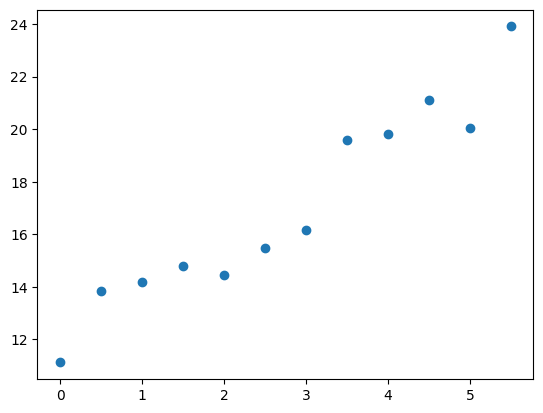

In [69]:
np.random.seed(42)
x1 = np.array([[x] for x in np.arange(0.0, 6.0, 0.5)])
y1 = np.array([[2* el[0] + 10 + np.random.rand()*3] for el in x])
plt.scatter(x, y)
plt.show()

In [78]:
print(X_train.shape[1])

10


In [ ]:
class MyLinReg:
    def __init__(self, lr = 0.0001, iter = 1000):
        self.lr = lr
        self.iter = iter
    
    def fit(self, X, y):
        w = np.zeros(X.shape[1])
        

In [72]:
class linReg:
    def __init__(self, lr = 0.0001, iter=1000):
        self.lr = lr
        self.iter = iter
    def transform_(self, x):
        return np.concatenate((np.ones((len(x), 1), x)), axis=1)
    def fun_error_(self, x, y, w):
        return sum((y-np.dot(x, w)) ** 2 / x.shape[0])
    def fit(self, x, y):
        dist = np.inf
        eps = 1e-4
        X = self.transform_(x)
        
        w = np.zeros(X.shape[1])
        iter = 0
        
        while dist > eps and iter <=self.iter:
            loss = self.fun_error_(X, y, w)
            w = w- self.lr *2 * np.dot(X.T, np.dot(X, w) - y)/ X.shape[0]
            dist = np.abs(loss - self.fun_error_(X, y, w))
            iter +=1
        self.w = w
    def predict(self, x):
        return np.dot(self.transform_(x), self.w)
    
lr = linReg().fit(X_train, y_train)
lr.predict()

TypeError: Cannot interpret '        pickup_longitude  pickup_latitude  dropoff_longitude  \
51781         -73.981850        40.732269         -73.963249   
212560        -73.966789        40.753113         -73.975121   
128763        -74.010490        40.711773         -73.973480   
713111        -73.977921        40.725441         -73.977196   
425648        -73.978218        40.751965         -74.013763   
...                  ...              ...                ...   
275443        -73.942947        40.811440         -73.975410   
164623        -73.966118        40.773830         -73.973190   
696232        -73.981377        40.773563         -73.964844   
195904        -73.969414        40.763401         -74.007729   
189377        -74.000938        40.741901         -73.982635   

        dropoff_latitude  hour_4_9  hour_10_15  hour_16_15  hour_night  \
51781          40.757740         0           0           0           1   
212560         40.758358         0           1           0           0   
128763         40.784737         0           1           0           0   
713111         40.753681         1           0           0           0   
425648         40.714672         1           0           0           0   
...                  ...       ...         ...         ...         ...   
275443         40.724609         0           0           0           1   
164623         40.762032         0           1           0           0   
696232         40.801838         1           0           0           0   
195904         40.742123         1           0           0           0   
189377         40.762352         0           1           0           0   

        pas0-3  pas4-6  
51781        0       1  
212560       1       0  
128763       1       0  
713111       0       1  
425648       1       0  
...        ...     ...  
275443       0       1  
164623       1       0  
696232       0       1  
195904       1       0  
189377       1       0  

[188621 rows x 10 columns]' as a data type

C:\Users\vpash\AppData\Local\Temp\ipykernel_2756\3809855451.py:46: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


100 epochs elapsed
Current accuracy is : 0.9836456109008862
Do you want to stop (y/*)??y


C:\Users\vpash\AppData\Local\Temp\ipykernel_2756\3809855451.py:87: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  h.show()


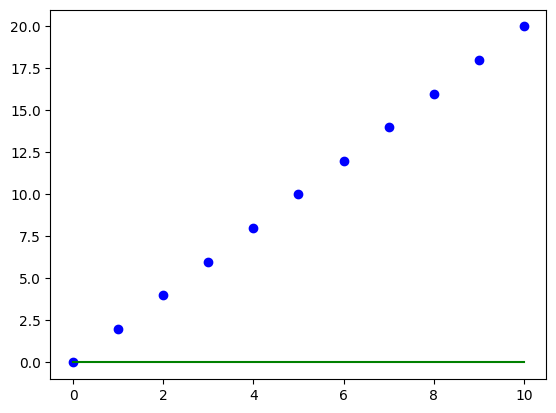

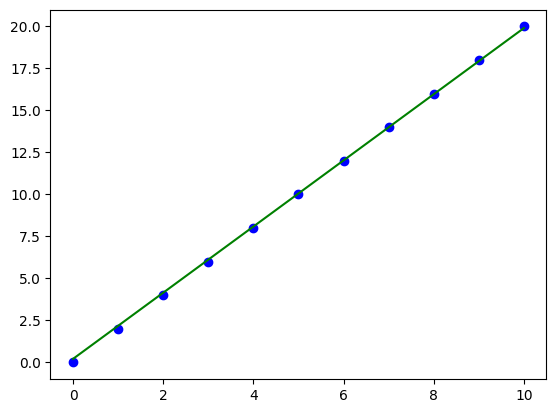

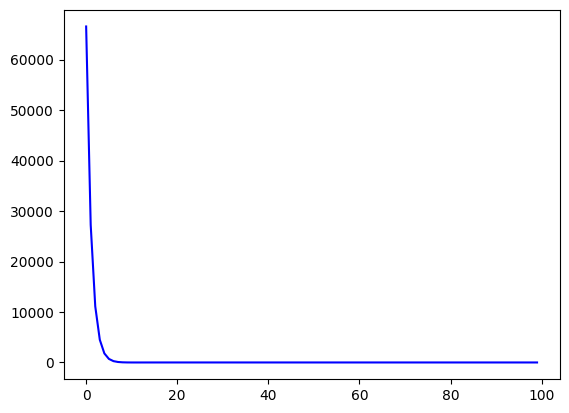

In [74]:
class Linear_Regression:
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y
        self.b = [0, 0]
     
    def update_coeffs(self, learning_rate):
        Y_pred = self.predict()
        Y = self.Y
        m = len(Y)
        self.b[0] = self.b[0] - (learning_rate * ((1/m) *
                                np.sum(Y_pred - Y)))
 
        self.b[1] = self.b[1] - (learning_rate * ((1/m) *
                                np.sum((Y_pred - Y) * self.X)))
 
    def predict(self, X=[]):
        Y_pred = np.array([])
        if not X: X = self.X
        b = self.b
        for x in X:
            Y_pred = np.append(Y_pred, b[0] + (b[1] * x))
 
        return Y_pred
     
    def get_current_accuracy(self, Y_pred):
        p, e = Y_pred, self.Y
        n = len(Y_pred)
        return 1-sum(
            [
                abs(p[i]-e[i])/e[i]
                for i in range(n)
                if e[i] != 0]
        )/n
    #def predict(self, b, yi):
 
    def compute_cost(self, Y_pred):
        m = len(self.Y)
        J = (1 / 2*m) * (np.sum(Y_pred - self.Y)**2)
        return J
 
    def plot_best_fit(self, Y_pred, fig):
                f = plt.figure(fig)
                plt.scatter(self.X, self.Y, color='b')
                plt.plot(self.X, Y_pred, color='g')
                f.show()
 
 
def main():
    X = np.array([i for i in range(11)])
    Y = np.array([2*i for i in range(11)])
 
    regressor = Linear_Regression(X, Y)
 
    iterations = 0
    steps = 100
    learning_rate = 0.01
    costs = []
     
    #original best-fit line
    Y_pred = regressor.predict()
    regressor.plot_best_fit(Y_pred, 'Initial Best Fit Line')
     
 
    while 1:
        Y_pred = regressor.predict()
        cost = regressor.compute_cost(Y_pred)
        costs.append(cost)
        regressor.update_coeffs(learning_rate)
         
        iterations += 1
        if iterations % steps == 0:
            print(iterations, "epochs elapsed")
            print("Current accuracy is :",
                regressor.get_current_accuracy(Y_pred))
 
            stop = input("Do you want to stop (y/*)??")
            if stop == "y":
                break
 
    #final best-fit line
    regressor.plot_best_fit(Y_pred, 'Final Best Fit Line')
 
    #plot to verify cost function decreases
    h = plt.figure('Verification')
    plt.plot(range(iterations), costs, color='b')
    h.show()
 
    # if user wants to predict using the regressor:
    regressor.predict([i for i in range(10)])
 
if __name__ == '__main__':
    main()

In [134]:
class LinearRegression1:
    def __init__(self, lr=0.0001, n_epochs=1000):
        self.lr = lr
        self.n_epochs = n_epochs

    def mse(self, y, y_pred):
        return np.sum(np.square(y - y_pred)) / y.shape[0]

    def loss_gradient_w(self, y_pred, y, x):
        return 2 * np.sum((y_pred - y) * x) / y.shape[0]

    def loss_gradient_b(self, y_pred, y, x):
        return 2 * np.sum(y_pred - y) / y.shape[0]

    def fit(self, X, y):
        self.w = 0
        self.b = 0
        for i in range(self.n_epochs):
            self.w = self.w - self.lr * self.loss_gradient_w(self.predict(X), y, X)
            #self.b = self.b - self.lr * self.loss_gradient_b(self.predict(X), y, X)
            print(f"MSE: {self.mse(y, self.predict(X))}")

    def predict(self, X):
        return self.w * X #+ self.b
    def w(self):
        return self.w
    
np.random.seed(42)
x1 = [np.array([[x] for x in np.arange(0.0, 6.0, 0.5)]),
      np.array([[x] for x in np.arange(0.0, 6.0, 0.5)])]
y1 = np.array([[2* el[0] + 10 + np.random.rand()*3] for el in x])

a = LinearRegression1(n_epochs=1000)
a.fit(X_train, y_train)
print(a.w)

plt.scatter(x1, y1)
plt.scatter(x1, a.predict(x1))
plt.show()

MemoryError: Unable to allocate 265. GiB for an array with shape (188621, 188621) and data type float64

In [135]:
import numpy as np
class MyLinearRegression:
    def __init__( self, learning_rate = 0.0001, iterations =1000 ) :
        self.learning_rate = learning_rate        
        self.iterations = iterations        

    def transform_(self, x):
        return np.concatenate((np.ones((len(x), 1)), x), axis = 1)

    def loss_func(self, x, y, w):
        return sum((y - np.dot(x, w)) ** 2  )/x.shape[0]

    def fit(self, x, y):
        dist = np.inf
        eps = 1e-20
        X = self.transform_(x)

        w = np.zeros(X.shape[1])
        iter = 0

        while iter <= self.iterations:
            loss = self.loss_func(X, y,w)
            w = w - self.learning_rate * 2 * np.dot(X.T, np.dot(X, w) - y) /X.shape[0]
            dist = np.abs(loss - self.loss_func(X, y,w))
            iter += 1
            
            if(dist <= eps):
                break
        print(iter)

        self.w = w
        return self
        

    def predict(self, x):
        return np.dot(self.transform_(x), self.w)
MyLinearRegression().fit(x1, y1)

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 3 dimension(s)